In [29]:
import pandas as pd
tip_df = pd.read_excel('C:/Users/dudgk/바탕화~1-DESKTOP-UF0J8M3-1332/산기대/파뿌리/dataset/Restaurant bills/bills.xlsx')

#tip_df.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day' 'time', 'size']


print(tip_df.head())
print('\n')
print(tip_df.tail())

print(tip_df.info())

   no  total_bill   tip     sex smoker  day    time  size
0   0       16.99  1.01  Female     No  Sun  Dinner     2
1   1       10.34  1.66    Male     No  Sun  Dinner     3
2   2       21.01  3.50    Male     No  Sun  Dinner     3
3   3       23.68  3.31    Male     No  Sun  Dinner     2
4   4       24.59  3.61  Female     No  Sun  Dinner     4


      no  total_bill   tip     sex smoker   day    time  size
239  239       29.03  5.92    Male     No   Sat     NaN     3
240  240       27.18  2.00  Female    Yes   Sat     NaN     2
241  241       22.67  2.00    Male    Yes   Sat  Dinner     2
242  242       17.82  1.75    Male     No   Sat  Dinner     2
243  243       18.78  3.00  Female     No  Thur  Dinner     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip  

In [26]:
#데이터의 기술통계 확인
tip_df.describe(include="all") 
#데이터 요약정보 확인
print(tip_df.info())
#형변환 필요X
#sex와 smoker를 카테고리로 바꾸는게 좋을까?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        214 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None


In [24]:
#데이터의 타입 알아보기
print(tip_df.dtypes)
print('\n')

no              int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object




In [65]:
#누락데이터 확인
print(tip_df.isnull().sum())

print('\n')

nan_time = tip_df['time'].value_counts(dropna=False)
print(nan_time)

import numpy as np
tip_df.replace('?', np.nan, inplace=True)

#?값을 nan값으로 바꾸고 확정하라
#결측치 처리

#tip_df = tip_df.astype({'time':np.object})
#mean_time =tip_df['time'].mean()
#tip_df['time'].fillna(mean_time, inplace=True)
#print(tip_df.describe(include='all'))
#왜,,,에러가 나지,,,

#-----------------------------
#nan_time = tip_df['time'].value_counts(dropna=False)
#print(nan_time)

#print(tip_df.head().isnull())



no             0
total_bill     0
tip            0
sex            0
smoker         0
day            0
time          30
size           0
dtype: int64


Dinner    154
Lunch      60
NaN        30
Name: time, dtype: int64


In [70]:
#print(tip_df.head().isnull())
#누락 데이터 제거
tip_df_time = tip_df.dropna(subset=['time'], how='any', axis=0)
print(len(tip_df_time))

print('\n')

print(tip_df.isnull().sum())
#삭제했는데 왜...누락값의 개수가 그대로이지..

214


no             0
total_bill     0
tip            0
sex            0
smoker         0
day            0
time          30
size           0
dtype: int64


In [96]:
tip_df.corr()
#왜...이것밖에 안나오지...?
#>>아래 표에 나타난 것으로는
#tip과 total bill, size가 관계가 깊다.

,no,total_bill,tip,size
no,1.000000,0.044526,-0.026709,0.008061
total_bill,0.044526,1.000000,0.675734,0.598315
tip,-0.026709,0.675734,1.000000,0.489299
size,0.008061,0.598315,0.489299,1.000000


Text(0.5, 1.0, 'Relationship between total_bill and tip amount')

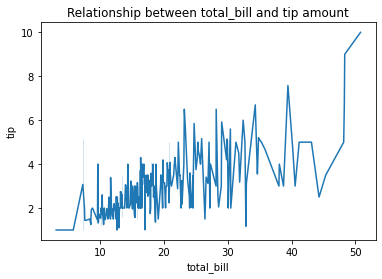

In [112]:
import seaborn as sns

#tip_df = sns.load_dataset("bills")
#tip_df.head()

plot = sns.lineplot(x=tip_df["total_bill"], y=tip_df["tip"])
plt.title("Relationship between total_bill and tip amount")
#plt.show
#>> 관계..? 잘 모르겠다 그래도 total bill이 커질수록 tip고 커지는 것 같네..

Text(0.5, 1.0, 'Relationship between size and tip amount')

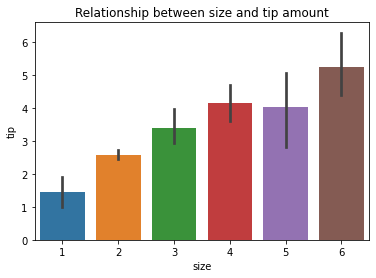

In [111]:
import seaborn as sns

plot = sns.barplot(x=tip_df["size"], y=tip_df["tip"])
plt.title("Relationship between size and tip amount")
#>> 조금 애매하지만 대체로 인원수가 많을 수록 팁을 많이 내는군
#>> total bill과 관련있지 않을까?

Text(0.5, 1.0, 'Relationship between size and total_bill')

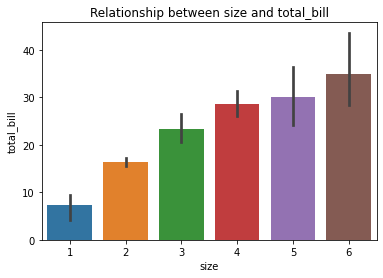

In [113]:
import seaborn as sns

plot = sns.barplot(x=tip_df["size"], y=tip_df["total_bill"])
plt.title("Relationship between size and total_bill")
#>> 역시 관계가 깊군. 근데 이걸 어떻게 활용?

Text(0.5, 1.0, 'Relationship between day and tip amount')

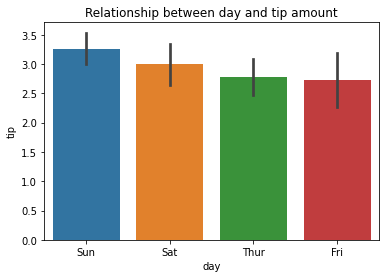

In [103]:
import seaborn as sns

plot = sns.barplot(x=tip_df["day"], y=tip_df["tip"])
plt.title("Relationship between day and tip amount")
#>> 일요일이 팁을 제일 많이 주는군

Text(0.5, 1.0, 'Relationship between day and total_bill')

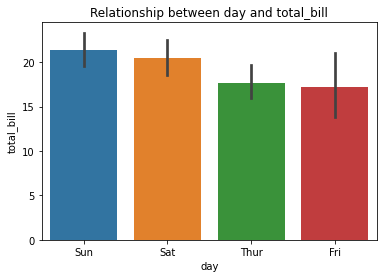

In [114]:
import seaborn as sns

plot = sns.barplot(x=tip_df["day"], y=tip_df["total_bill"])
plt.title("Relationship between day and total_bill")
#>> 역시 일요일일수록 토탈 빌이 높군

Text(0.5, 1.0, 'Relationship between time and tip amount')

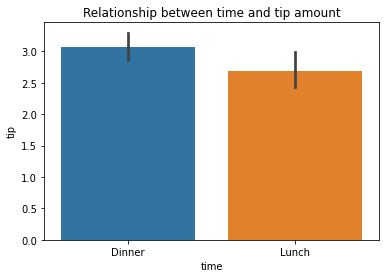

In [116]:
import seaborn as sns

plot = sns.barplot(x=tip_df["time"], y=tip_df["tip"])
plt.title("Relationship between time and tip amount")

Text(0.5, 1.0, 'Relationship between time and total_bill')

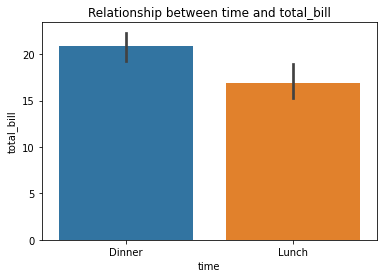

In [117]:
import seaborn as sns

plot = sns.barplot(x=tip_df["time"], y=tip_df["total_bill"])
plt.title("Relationship between time and total_bill")
#>>음 이정도면 토탈빌이 높을 수록 팁 금액이 높은게 맞겠는걸

Text(0.5, 0.98, 'Bills size/tip - Regression on Scatter')

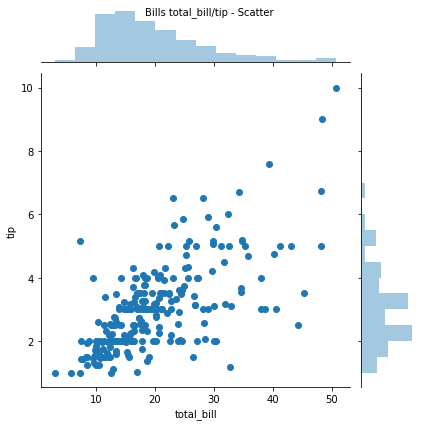

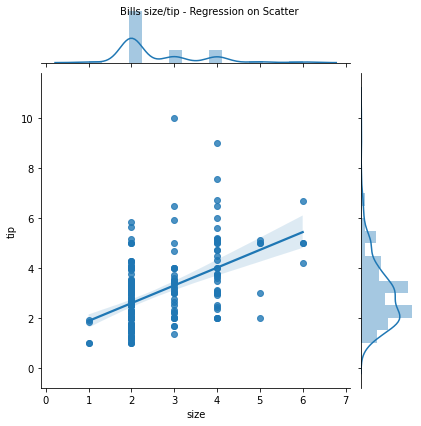

In [105]:
jop1 = sns.jointplot(x='total_bill', y='tip', kind = 'scatter', data = tip_df)
jop2 = sns.jointplot(x='size', y='tip', kind = 'reg', data = tip_df)

jop1.fig.suptitle('Bills total_bill/tip - Scatter', size = 10)
jop2.fig.suptitle('Bills size/tip - Regression on Scatter', size = 10)


In [14]:
## 아쉬운점 
#1.얼마부터 많은 금액의 팁이라는 것을 분명히 하고 싶다.
#2. 지금 한 것처럼 단순한 결과값을 내놓는게 아니라 DT나 PCA를 활용해 좀 더 유의미한 결과를 내고 싶다.
#3. 코드 한 줄을 짜더라도 확실하게 알고있지 않다는 점이 제일 자괴감이 들었다..ㅠㅠ 
#4. 복습 열심히 할 걸..

      no  total_bill    tip    sex  smoker    day   time   size
0  False       False  False  False   False  False  False  False
1  False       False  False  False   False  False  False  False
2  False       False  False  False   False  False  False  False
3  False       False  False  False   False  False  False  False
4  False       False  False  False   False  False  False  False
